In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack


In [5]:

def FFT_main(t, x, dt, split_t_r, overlap, window_F, output_FN, y_label, y_unit):
 
    #データをオーバーラップして分割する。
    split_data = data_split(t, x, split_t_r, overlap)
 
    #FFTを行う。
    FFT_result_list = []
    for split_data_cont in split_data:
        FFT_result_cont = FFT(split_data_cont, dt, window_F)
        FFT_result_list.append(FFT_result_cont)
 
    """
    #各フレームのグラフ化
    IDN = 0
    for split_data_cont, FFT_result_cont in zip(split_data, FFT_result_list):
        IDN = IDN+1
        plot_FFT(split_data_cont[0], split_data_cont[1], FFT_result_cont[0], FFT_result_cont[1], output_FN, IDN, 0, y_label, y_unit)
    """
 
    #平均化
    fq_ave = FFT_result_list[0][0]
    F_abs_amp_ave = np.zeros(len(fq_ave))
    for i in range(len(FFT_result_list)):
        F_abs_amp_ave = F_abs_amp_ave + FFT_result_list[i][1]
    F_abs_amp_ave = F_abs_amp_ave/(i+1)
 
    plot_FFT(t, x, fq_ave, F_abs_amp_ave, output_FN, "ave", 1, y_label, y_unit)
 
    return fq_ave, F_abs_amp_ave
 
def plot_FFT(t, x, fq, F_abs_amp, output_FN, IDN, final_graph, y_label, y_unit):
    fig = plt.figure(figsize=(12, 4))
    ax2 = fig.add_subplot(121)
    title1 = "time_" + output_FN[:-4]
    plt.plot(t, x)
    plt.xlabel("time [s]")
    plt.ylabel(y_label+"["+y_unit+"]")
    plt.title(title1)
 
    ax2 = fig.add_subplot(122)
    title2 = "freq_" + output_FN[:-4]
    plt.xlabel('freqency(Hz)')
    plt.ylabel(y_label+"["+y_unit+"/rtHz]")
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(fq, F_abs_amp)
    plt.title(title2)
 
    if final_graph == 0:
        plt.savefig(output_FN[:-4]+"_"+str(IDN)+"_FFTtemp"+output_FN[-4:], dpi=300)
    elif final_graph == 1:
        plt.savefig(output_FN, dpi=300)
 
    return 0
 
def FFT(data_input, dt, window_F):
 
    N = len(data_input[0])
 
    #窓の用意
    if window_F == "hanning":
        window = np.hanning(N)          # ハニング窓
    elif window_F == "hamming":
        window = np.hamming(N)          # ハミング窓
    elif window_F == "blackman":
        window = np.blackman(N)         # ブラックマン窓
    else:
        print("Error: input window function name is not sapported. Your input: ", window_F)
        print("Hanning window function is used.")
        hanning = np.hanning(N)          # ハニング窓
 
    #窓関数後の信号
    x_windowed = data_input[1]*window
 
    #FFT計算
    F = np.fft.fft(x_windowed)
    F_abs = np.abs(F)
    F_abs_amp = F_abs / N * 2
    fq = np.linspace(0, 1.0/dt, N)
 
    #窓補正
    acf=1/(sum(window)/N)
    F_abs_amp = acf*F_abs_amp
 
    #ナイキスト定数まで抽出
    fq_out = fq[:int(N/2)+1]
    F_abs_amp_out = F_abs_amp[:int(N/2)+1]
 
    return [fq_out, F_abs_amp_out]
 
def data_split(t, x, split_t_r, overlap):
 
    split_data = []
    one_frame_N = int(len(t)*split_t_r) #1フレームのサンプル数
    overlap_N = int(one_frame_N*overlap) #オーバーラップするサンプル数
    start_S = 0
    end_S = start_S + one_frame_N
 
    while True:
        t_cont = t[start_S:end_S]
        x_cont = x[start_S:end_S]
        split_data.append([t_cont, x_cont])
 
        start_S = start_S + (one_frame_N - overlap_N)
        end_S = start_S + one_frame_N
 
        if end_S > len(t):
            break
 
 
    return np.array(split_data)



(array([ 0.        ,  0.05561735,  0.11123471,  0.16685206,  0.22246941,
         0.27808676,  0.33370412,  0.38932147,  0.44493882,  0.50055617,
         0.55617353,  0.61179088,  0.66740823,  0.72302558,  0.77864294,
         0.83426029,  0.88987764,  0.94549499,  1.00111235,  1.0567297 ,
         1.11234705,  1.1679644 ,  1.22358176,  1.27919911,  1.33481646,
         1.39043382,  1.44605117,  1.50166852,  1.55728587,  1.61290323,
         1.66852058,  1.72413793,  1.77975528,  1.83537264,  1.89098999,
         1.94660734,  2.00222469,  2.05784205,  2.1134594 ,  2.16907675,
         2.2246941 ,  2.28031146,  2.33592881,  2.39154616,  2.44716352,
         2.50278087,  2.55839822,  2.61401557,  2.66963293,  2.72525028,
         2.78086763,  2.83648498,  2.89210234,  2.94771969,  3.00333704,
         3.05895439,  3.11457175,  3.1701891 ,  3.22580645,  3.2814238 ,
         3.33704116,  3.39265851,  3.44827586,  3.50389321,  3.55951057,
         3.61512792,  3.67074527,  3.72636263,  3.7

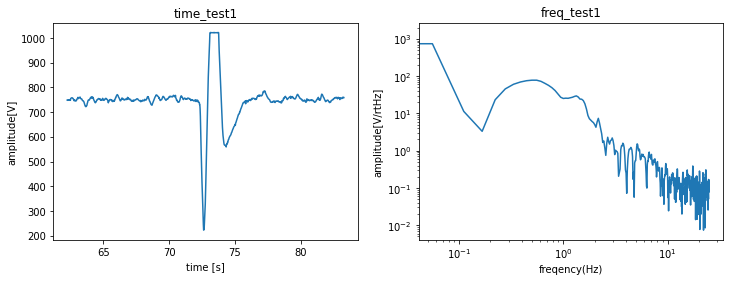

In [11]:
 
df = pd.read_csv('../data/raspi3b.csv', header=None)
hz = 50

t = np.array(df.iloc[hz*60:hz*80, 0])
x = np.array(df.iloc[hz*60:hz*80, 1])
#dt = 0.01 #This value should be correct as real.
dt = 1 / hz
output_FN = "test1.png"

split_t_r = 0.9 #1つの枠で全体のどの割合のデータを分析するか。
overlap = 0.5 #オーバーラップ率
window_F = "hanning" #窓関数選択: hanning, hamming, blackman
y_label = "amplitude"
y_unit = "V"
FFT_main(t, x, dt, split_t_r, overlap, window_F, output_FN, y_label, y_unit)